In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from logging import log

In [ ]:
csv_url = "https://raw.githubusercontent.com/md-lorente/data/master/precio_gasolina.csv"

gas_df = pd.read_csv(csv_url, sep= ";",parse_dates=["Toma_de_datos","Fecha_extraccion"])

gas_df.head()


,Provincia,Localidad,Codigo_postal,Direccion,Margen,Toma_de_datos,Precio,Rotulo,Tipo_venta,Rem,Horario,Tipo_servicio,Fecha_extraccion
0,SANTA CRUZ DE TENERIFE,CUESTA LA,38320,AVENIDA LOS MENCEYES 223,D,2020-01-08 13:53:00,"0,758",PCAN,P,dm,LD 24H,LD 24H A,2020-01-08
1,SANTA CRUZ DE TENERIFE,LA LAGUNA,38200,CARRETERA TF111 KM 8 346,D,2020-01-08 09:00:00,"0,759",OCEANO,P,dm,LS 06002200 D 07002200,LS 06002200 A D 07002200 A,2020-01-08
2,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38110,CALLE LAURA GROTE DE LA PUERTA 2,D,2020-07-27 12:02:00,"0,769",GMOIL,P,dm,LV 24H S 06002000 D 08001500,LV 24H A S 06002000 A D 08001500 A,2020-01-08
3,SANTA CRUZ DE TENERIFE,SANTA CRUZ DE TENERIFE,38010,POLIGONO EL MAYORAZGO SN,N,2020-07-29 00:00:00,"0,789",TGASTU TREBOL,P,dm,LS 07302100 D 08001400,LS 07302100 A D 08001400 A,2020-01-08
4,SANTA CRUZ DE TENERIFE,ADEJE,38670,CALLE CHARFA ESQUINA AVENIDA LAS PALMITAS SN,D,2020-07-27 11:59:00,"0,789",GMOIL,P,dm,LS 07002200 D 09001600,LS 07002200 A D 09001600 A,2020-01-08


In [ ]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         9991 non-null   object        
 1   Localidad         9991 non-null   object        
 2   Codigo_postal     9991 non-null   int64         
 3   Direccion         9991 non-null   object        
 4   Margen            9991 non-null   object        
 5   Toma_de_datos     9991 non-null   datetime64[ns]
 6   Precio            9991 non-null   object        
 7   Rotulo            9990 non-null   object        
 8   Tipo_venta        9991 non-null   object        
 9   Rem               9991 non-null   object        
 10  Horario           9991 non-null   object        
 11  Tipo_servicio     9845 non-null   object        
 12  Fecha_extraccion  9991 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 1014.8+ KB


In [ ]:
#Variable precio convertida a número

gas_df["Precio"].replace(",",".", inplace=True, regex=True)
gas_df["Precio"] = gas_df["Precio"].astype(np.float64)




In [ ]:
#Análisis de variables

#Creo un Dataframe para tener una visión general de los 4 items a analizar (Nombre, tipo de objeto, clasificación estadística y 
# clasificación según análisis del dato)

analisis_variables = pd.DataFrame(columns = ["Nombre variable",
                                             "Tipo de objeto",
                                             "Naturaleza de la variable",
                                             "Tipo Var Estadística",
                                             "Tipo Var análisis de dato"])

# Provincia es una variable cualitativa nominal ya que ninguna provincia tiene mas jerarquía que otra y simplemente se toman como "dimensiones"

provincia = {"Nombre variable": "Provincia", "Tipo de objeto": gas_df["Provincia"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Nominal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(provincia, ignore_index= True)

#Igual que provincia

localidad = {"Nombre variable": "Localidad", "Tipo de objeto": gas_df["Localidad"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Nominal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(localidad, ignore_index= True)

#El código postal, si bien es numérico, es una variable cuantitativa en su origen, pero cualitativa en su análisis.
# No se va a utilizar para efectuar operaciones con dicho número. 

codigo_postal = {"Nombre variable": "Codigo_postal", "Tipo de objeto": gas_df["Codigo_postal"].dtype, "Naturaleza de la variable" : "Cuantitativa",
                 "Tipo Var Estadística": "Cuantitativa Discreta", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(codigo_postal, ignore_index= True)

# Es el mismo caso que en la variable provincia/localidad.

direccion = {"Nombre variable": "Direccion", "Tipo de objeto": gas_df["Direccion"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Nominal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(direccion, ignore_index= True)

# Los únicos valores posibles para margen son D,N,I. En este caso suponemos que el margen es nominal y no ordinal, ya que en la página web de información
# del data set no se especifica la naturaleza a la que refiere el margen. En el caso de que fuera, por ejemplo, un margen respecto a un benchmark de precios
# se podría decir que la variable es ordinal y no nominal.

margen = {"Nombre variable": "Margen", "Tipo de objeto": gas_df["Margen"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Nominal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(margen, ignore_index= True)

# Como vimos en la clase, la variable tiempo es una cuantitativa contínua. De todas maneras, a efectos del análisis, se toma como categórica
# ya que se utilizará para ubicar las observaciones en el tiempo.
toma_de_datos = {"Nombre variable": "Toma_de_datos", "Tipo de objeto": gas_df["Toma_de_datos"].dtype, "Naturaleza de la variable" : "Cuantitativa",
                 "Tipo Var Estadística": "Cuantitativa continua", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(toma_de_datos, ignore_index= True)

# El precio es una variable cuantitativa continua que puede tomar infinitos valores dentro de X rango.

precio = {"Nombre variable": "Precio", "Tipo de objeto": gas_df["Precio"].dtype, "Naturaleza de la variable" : "Cuantitativa",
                 "Tipo Var Estadística": "Cuantitativa continua", "Tipo Var análisis de dato": "Variable cuantitativa"}

analisis_variables = analisis_variables.append(precio, ignore_index= True)

# Es una etiqueta (tal vez del nombre de la gasolinera) y por tanto es una variable cualitativa nominal (al igual que provincia).

rotulo = {"Nombre variable": "Rotulo", "Tipo de objeto": gas_df["Rotulo"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Nominal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(rotulo, ignore_index= True)


#Si partimos de la base del diccionario oficial proporcionado por el gobierno español, podemos presuponer que la variable es dicotómica simétrica.
# Sin embargo, al explorar el dataset se encuentra que hay dos valores posibles mas para esta variable ("A" y "N"). Dado lo anterior, se determina
# que la variable es nominal pero no dicotómica.

tipo_venta = {"Nombre variable": "Tipo_venta", "Tipo de objeto": gas_df["Tipo_venta"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa nominal", "Tipo Var análisis de dato": "Variable categórica"}
                 

analisis_variables = analisis_variables.append(tipo_venta, ignore_index= True)

# En este caso sí nos encontramos ante una variable dicotómica simétrica. Esto quiere decir que Rem admite solo dos valores (OM y DM) y que
# a su vez, los mismos tienen igual peso; no es como aquellos casos donde la dicotomía registra la ausencia/presencia en los cuales sería 
# asimétrica (ej fumador si/no). Por último, esta variable se puede tomar tanto como categórica como analítica a los efectos del análisis de datos.

rem = {"Nombre variable": "Rem", "Tipo de objeto": gas_df["Rem"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa dicotómica simétrica", "Tipo Var análisis de dato": "Variable categórica o analítica"}

analisis_variables = analisis_variables.append(rem, ignore_index= True)

#Esta variable se puede ordenar, por ejemplo, de menor a mayor rango de horario de atención. Es por esto que es una variable ordinal.

horario = {"Nombre variable": "Horario", "Tipo de objeto": gas_df["Horario"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Ordinal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(horario, ignore_index= True)

# En este caso tomé que la variable sigue un orden yendo desde el menor grado de servicio (self service) hasta el mayor (donde hay personal cargando
# la gasolina y también dentro en el mini mercado). Tomando eso como criterio, podríamos decir que la variable sigue un orden bien establecido.

tipo_servicio = {"Nombre variable": "Tipo_servicio", "Tipo de objeto": gas_df["Tipo_servicio"].dtype, "Naturaleza de la variable" : "Cualitativa",
                 "Tipo Var Estadística": "Cualitativa Ordinal", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(tipo_servicio, ignore_index= True)

# Idem Toma_de_datos

fecha_extraccion = {"Nombre variable": "Fecha_extraccion", "Tipo de objeto": gas_df["Fecha_extraccion"].dtype, "Naturaleza de la variable" : "Cuantitativa",
                 "Tipo Var Estadística": "Cuantitativa discreta", "Tipo Var análisis de dato": "Variable categórica"}

analisis_variables = analisis_variables.append(fecha_extraccion, ignore_index= True)

analisis_variables

,Nombre variable,Tipo de objeto,Naturaleza de la variable,Tipo Var Estadística,Tipo Var análisis de dato
0,Provincia,object,Cualitativa,Cualitativa Nominal,Variable categórica
1,Localidad,object,Cualitativa,Cualitativa Nominal,Variable categórica
2,Codigo_postal,int64,Cuantitativa,Cuantitativa Discreta,Variable categórica
3,Direccion,object,Cualitativa,Cualitativa Nominal,Variable categórica
4,Margen,object,Cualitativa,Cualitativa Nominal,Variable categórica
5,Toma_de_datos,datetime64[ns],Cuantitativa,Cuantitativa continua,Variable categórica
6,Precio,float64,Cuantitativa,Cuantitativa continua,Variable cuantitativa
7,Rotulo,object,Cualitativa,Cualitativa Nominal,Variable categórica
8,Tipo_venta,object,Cualitativa,Cualitativa nominal,Variable categórica
9,Rem,object,Cualitativa,Cualitativa dicotómica simétrica,Variable categórica o analítica


In [ ]:
#Elimino los diccionarios usados para ahorrar memoria

del provincia
del localidad
del codigo_postal
del direccion
del margen
del toma_de_datos
del precio
del rotulo
del tipo_venta
del rem
del horario
del tipo_servicio
del fecha_extraccion


In [ ]:
#Tabla de frecuencias para provincias

#Genero un nuevo data frame a partir del listado de provincias que hay en gas_df

provincias_col = gas_df["Provincia"].copy(deep=True)
provincias_df = pd.DataFrame(provincias_col)
del provincias_col

# La frecuencia absoluta será un recuento por agrupación de provincia
provincias_df["Frecuencia absoluta"] = provincias_df.groupby(["Provincia"]).Provincia.transform("count")

# Remuevo duplicados de provincia - solo quiero la info resumida por provincia y no repetida
provincias_df.drop_duplicates(subset=["Provincia"], inplace=True)

# Ordeno por provincia de manera ascendente
provincias_df.sort_values(by="Provincia", inplace= True)

# Agrego frecuencia absoluta acumulada; que será una suma acumulativa de cada valor

provincias_df["Frec. Absoluta Acumulada"]= provincias_df["Frecuencia absoluta"].cumsum()

# Calculo la frecuencia relativa, que será la división para cada línea de el valor de su frec absoluta dividida la frecuencia total

provincias_df["Frecuencia relativa"] = provincias_df["Frecuencia absoluta"] / provincias_df["Frecuencia absoluta"].sum()

# Calculo de frecuencia relativa acumulada, que se podrá hacer de dos formas. Por un lado simplemente como la suma acumulativa de la frecuencia relativa
# mientras que por el otro se puede ver como la división de la frec absoluta acumulada por la frecuencia total.
# Para asegurarme de que la frecuencia relativa está bien calculada (y suma 1 en total) voy a tomar la primer opción

provincias_df["Frec. Relativa Acumulada"] = provincias_df["Frecuencia relativa"].cumsum()

# Ordenado de menor a mayor según frecuencia absoluta


provincias_df






,Provincia,Frecuencia absoluta,Frec. Absoluta Acumulada,Frecuencia relativa,Frec. Relativa Acumulada
559,ALBACETE,133,133,0.013312,0.013312
651,ALICANTE,408,541,0.040837,0.054149
285,ALMERIA,184,725,0.018417,0.072565
1082,ARABA ALAVA,61,786,0.006105,0.078671
927,ASTURIAS,203,989,0.020318,0.098989
1591,AVILA,62,1051,0.006206,0.105195
228,BADAJOZ,207,1258,0.020719,0.125913
2226,BALEARS ILLES,194,1452,0.019417,0.145331
269,BARCELONA,723,2175,0.072365,0.217696
956,BIZKAIA,117,2292,0.011711,0.229406


Para el análisis de esta variable, decido usar un gráfico de barras que refleje la frecuencia absoluta de cada provincia. Ordenadas las provincias por Freq Absoluta en orden descendente.


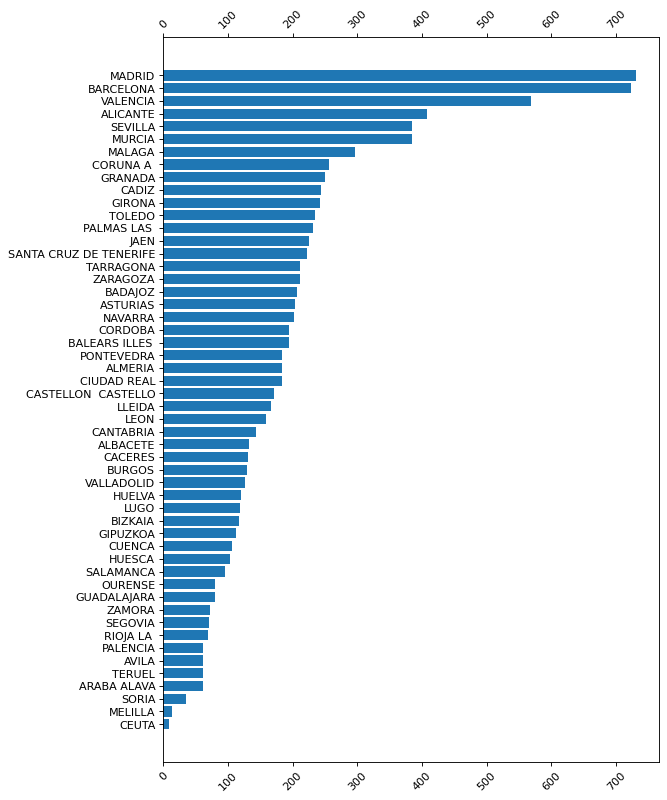

In [ ]:
#Creo la figura

fig = plt.figure(figsize=(8,12), dpi= 80)

# Genero un data frame temporal con los valores ordenados por frecuencia absoluta.

temp_df = pd.DataFrame(provincias_df.copy())
temp_df.sort_values(by= "Frecuencia absoluta", inplace= True)

# Activo los indicadores del eje X tanto arriba como abajo para facilitar la lectura del gráfico

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Gráfico de barras horizontal

plt.barh( temp_df["Provincia"], temp_df["Frecuencia absoluta"])

# Rotación del texto de X en 45 grados.

plt.xticks(rotation=45)


fig.show()

In [ ]:
#Análisis para la variable Margen

margen_col = gas_df["Margen"].copy(deep= True)
margen_df = pd.DataFrame(margen_col)
del margen_col

# Calculo la frecuencia absoluta

margen_df["Frecuencia absoluta"] = margen_df.groupby(["Margen"]).Margen.transform("count")
margen_df.drop_duplicates(subset=["Margen"], inplace= True)
margen_df.sort_values(by = ["Margen"], inplace= True)
# Frecuencia absoluta acumulada

margen_df["Frecuencia absoluta acumulada"] = margen_df["Frecuencia absoluta"].cumsum()

# Frecuencia relativa

margen_df["Frecuencia relativa"] = margen_df["Frecuencia absoluta"] / margen_df["Frecuencia absoluta"].sum()

# Frecuencia relativa acumulada

margen_df["Frecuencia relativa acumulada"] = margen_df["Frecuencia absoluta"].cumsum() / margen_df["Frecuencia absoluta"].sum()
margen_df

,Margen,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,D,5016,5016,0.502052,0.502052
18,I,2596,7612,0.259834,0.761886
3,N,2379,9991,0.238114,1.000000


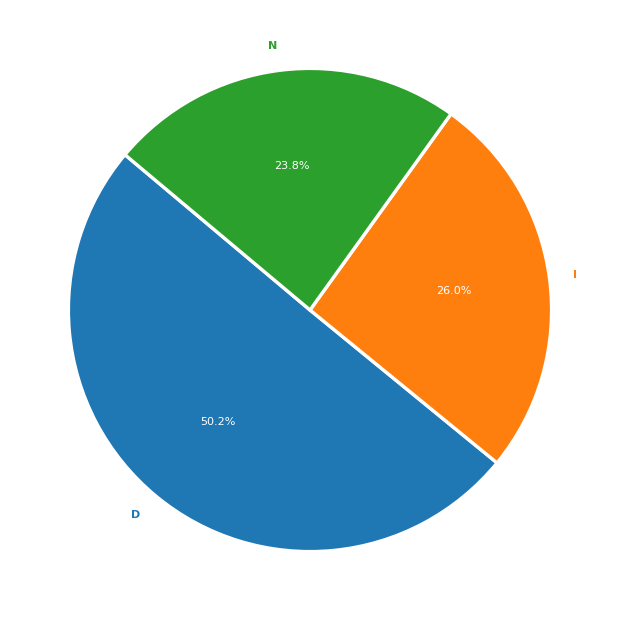

In [ ]:
# Para grafica las frecuencias de esta variable, se podrían tomar dos distintas opciones. Dado que la cantidad de categorías es baja, 
# un gráfico de torta es posible; algo que no podría ser hecho anteriormente con el caso de 'Provincia' por su amplia cantidad de categorías.

fig = plt.figure(figsize= (12,10), dpi = 80)

# Creo el gráfico, dandole un margen derecho a cada límite de la tarta y formateando porcentajes para cada uno.

patches, texts, pcts = plt.pie(margen_df["Frecuencia absoluta"], labels = margen_df["Margen"], 
                               autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

# Con los objetos generados en el gráfico anterior, itero sobre las formas generadas y le aplico su color al texto (label) asociado.

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

plt.show()

In [ ]:
# Análisis de precio

precio_col = gas_df["Precio"].sort_values().copy()
precio_df = pd.DataFrame(precio_col)
del precio_col

#Frecuencia absoluta

#Para estos cálculos, dado que es una variable continua, conviene primero que nada generar intervalos dentro de los cuales caerán los valores.
#Para hacerlo, utilizo la regla de Struges que podrá otorgar una idea de cuantos intervalos de deberían generar.

print(" Intervalos según Struges = {}\n ".format(1+3.22*np.log10(len(precio_df))))

# El cálculo se aproxima a 14. En este caso voy a utilizar la función cut para generar intervalos de igual amplitud y diferentes frecuencias.
# En el caso de querer utilizar intervalos de igual frecuencia, utilizaría qcut.

precio_df["Intervalo"] = pd.cut(precio_df["Precio"], 14)

precio_df["Frecuencia absoluta"] = precio_df.groupby("Intervalo").Intervalo.transform("count")
precio_df.drop_duplicates(subset = "Intervalo", inplace= True)
precio_df.reset_index(inplace=True)
precio_df.drop(columns = ["Precio","index"], inplace=True)

# Frecuencia acumulada absoluta

precio_df["Frecuencia acumulada absoluta"] = precio_df["Frecuencia absoluta"].cumsum()

#Frecuencia relativa

precio_df["Frecuencia relativa"] = precio_df["Frecuencia absoluta"] / precio_df["Frecuencia absoluta"].sum()

#Frecuencia relativa acumulada

precio_df["Frecuencia relativa acumulada"] = precio_df["Frecuencia absoluta"].cumsum() / precio_df["Frecuencia absoluta"].sum()

precio_df


 Intervalos según Struges = 13.878740847887965
 


,Intervalo,Frecuencia absoluta,Frecuencia acumulada absoluta,Frecuencia relativa,Frecuencia relativa acumulada
0,"(0.757, 0.807]",6,6,0.000601,0.000601
1,"(0.807, 0.857]",29,35,0.002903,0.003503
2,"(0.857, 0.906]",112,147,0.011210,0.014713
3,"(0.906, 0.955]",86,233,0.008608,0.023321
4,"(0.955, 1.004]",240,473,0.024022,0.047343
5,"(1.004, 1.054]",456,929,0.045641,0.092984
6,"(1.054, 1.103]",1124,2053,0.112501,0.205485
7,"(1.103, 1.152]",1427,3480,0.142829,0.348313
8,"(1.152, 1.202]",3721,7201,0.372435,0.720749
9,"(1.202, 1.251]",2543,9744,0.254529,0.975278


<Figure size 640x960 with 0 Axes>

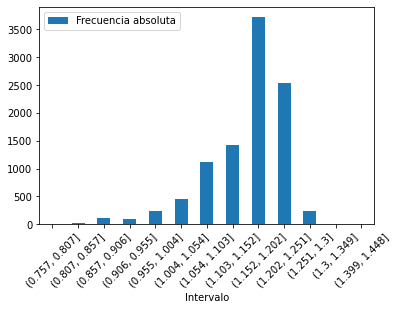

In [ ]:
fig = plt.figure(figsize=(8,12), dpi= 80)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
precio_df.plot.bar(x="Intervalo", y= "Frecuencia absoluta")
plt.xticks(rotation= 45)

fig.show()

In [ ]:
#Análisis principales estadísticos de la variable precio:

print(gas_df["Precio"].describe())
print("\nEl valor de la moda de la serie es: {}".format(pd.Series(gas_df["Precio"]).mode()[0]))

count    9991.000000
mean        1.157277
std         0.075267
min         0.758000
25%         1.119000
50%         1.179000
75%         1.209000
max         1.448000
Name: Precio, dtype: float64

El valor de la moda de la serie es: 1.199


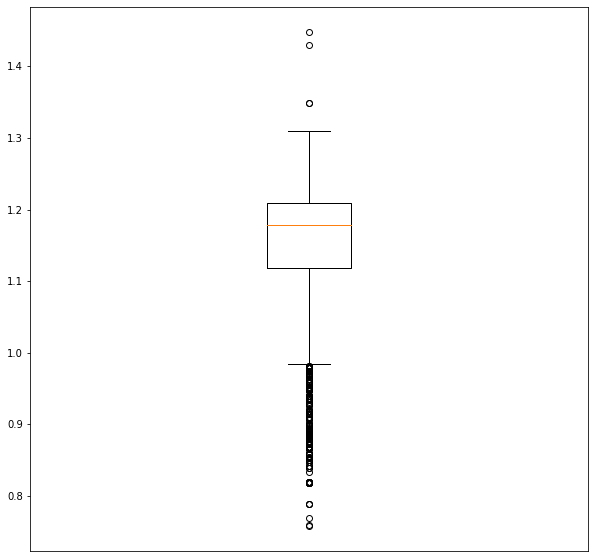

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.boxplot(gas_df["Precio"])

fig.show()

Como se puede ver en el diagrama de caja, hay varios valores outliers tanto por debajo como por encima. En el histograma anterior (ajustado por intervalos) se pudo ver que había una mayor concentración de valores extremos hacia la izquierda de la moda (1.199) con respecto a su contraparte a la derecha. Con este boxplot podemos confirmar lo mismo dada la alta concentración de outliers para valores menores. Por otro lado, el "pequeño" tamaño de la caja denota una alta concentración de datos en un pequeño tramo de valores de precio (bajo IQR).